In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from ast import literal_eval
import missingno as msno

In [2]:
df1 = pd.read_csv('credits.csv')
df2 = pd.read_csv('movies_metadata.csv')
df3 = pd.read_csv('keywords.csv')

/var/folders/8h/nx3x8mmn75l3sksvyyy0fd280000gn/T/ipykernel_2093/766889010.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('movies_metadata.csv')


In [3]:
df1.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
df2.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df2_clean = df2.copy()
df2_clean['id'] = pd.to_numeric(df2_clean['id'], errors='coerce')
df2_clean = df2_clean.dropna(subset=['id']).reset_index(drop=True)
df2_clean['id'] = df2_clean['id'].astype(int)

In [8]:
df = df2_clean.merge(df1,on='id')

In [9]:
df = df.merge(df3,on='id')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  46628 non-null  object 
 1   belongs_to_collection  4574 non-null   object 
 2   budget                 46628 non-null  object 
 3   genres                 46628 non-null  object 
 4   homepage               8009 non-null   object 
 5   id                     46628 non-null  int64  
 6   imdb_id                46611 non-null  object 
 7   original_language      46617 non-null  object 
 8   original_title         46628 non-null  object 
 9   overview               45633 non-null  object 
 10  popularity             46624 non-null  object 
 11  poster_path            46229 non-null  object 
 12  production_companies   46624 non-null  object 
 13  production_countries   46624 non-null  object 
 14  release_date           46540 non-null  object 
 15  re

In [11]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


<Axes: >

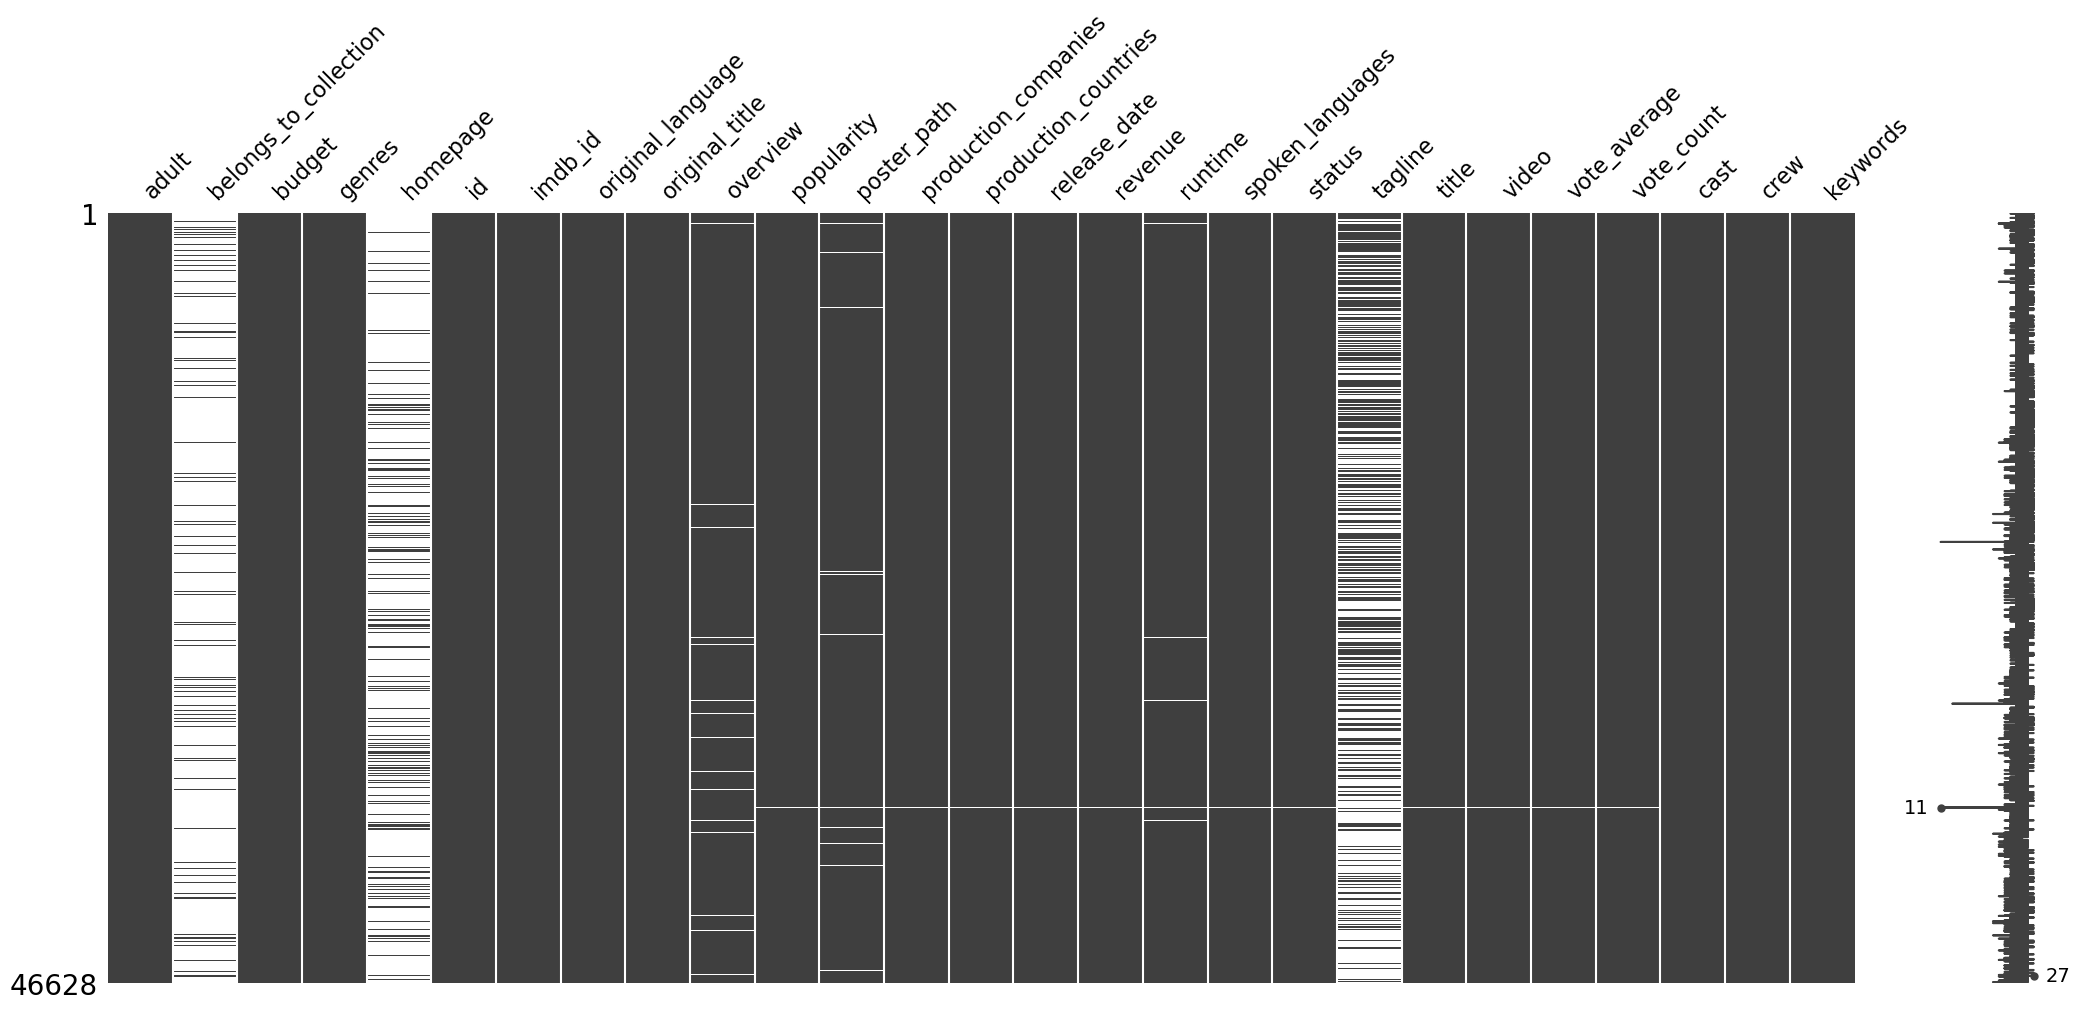

In [12]:
msno.matrix(df)

A movie with a rating of 10 and 2 votes cannot be better than a movie with a rating of 8 and 100 votes. In order to fix this, we use a formula called - weighted IMDB rating (wr)

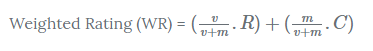

- v - number of votes for the movie
- m - the minimum number of votes to get a rating
- R - average votes by ratings
- C - average of votes throughout the report

In [13]:
C = df['vote_average'].mean()
C

5.6117278654770075

In [14]:
m = df['vote_count'].quantile(0.99)
m

2144.079999999987

In [15]:
wr_movies = df2.copy().loc[df2['vote_count'] >= m]
wr_movies.shape

(464, 24)

In [16]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)
wr_movies['score'] = wr_movies.apply(weighted_rating, axis=1)

**Let's see the top 10 of our filter**

In [17]:
wr_movies = wr_movies.sort_values('score', ascending=False)

wr_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,7.910337
12481,The Dark Knight,12269.0,8.3,7.900094
2843,Fight Club,9678.0,8.3,7.812449
15480,Inception,14075.0,8.1,7.771063
292,Pulp Fiction,8670.0,8.3,7.767003
834,The Godfather,6024.0,8.5,7.741843
22879,Interstellar,11187.0,8.1,7.699803
351,Forrest Gump,8147.0,8.2,7.660750
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,7.585534
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.536009


baseline for recommender system)

In [18]:
df['popularity'] = df['popularity'].astype(float)

In [19]:
pop = df.sort_values('popularity', ascending=False)

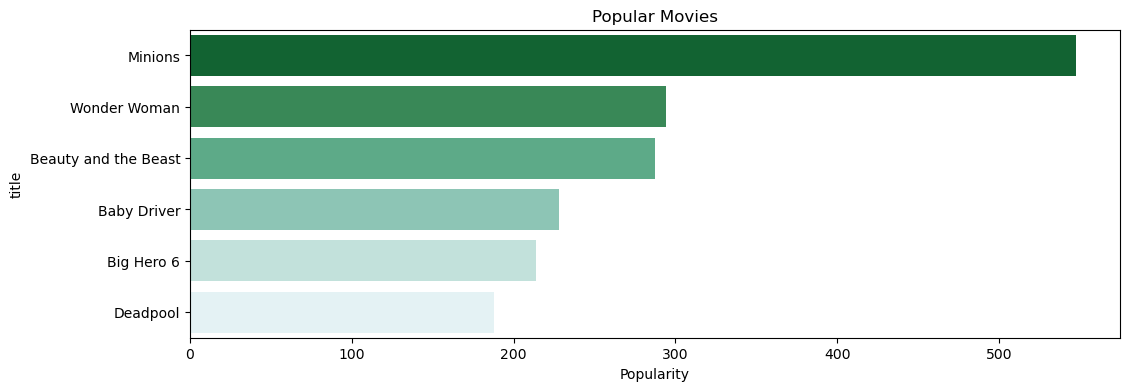

In [20]:
plt.figure(figsize=(12, 4))
sns.barplot(x=pop['popularity'].head(6), y=pop['title'].head(6), palette='BuGn_r', orient='h')
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show()

- Complicate the model, add recommendations based on reviews

In [21]:
tfidf = TfidfVectorizer(stop_words='english')
df['overview'] = df['overview'].fillna('')

In [22]:
tfidf_matrix = tfidf.fit_transform(df['overview'])
tfidf_matrix.shape

(46628, 75827)

In [23]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [25]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
        
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [26]:
get_recommendations('The Godfather')

1199               The Godfather: Part II
45195    The Godfather Trilogy: 1972-1990
1934              The Godfather: Part III
23322                          Blood Ties
11399                    Household Saints
34932                   Start Liquidation
10916                            Election
39199            A Mother Should Be Loved
17919                   Short Sharp Shock
26508                  Beck 28 - Familjen
Name: title, dtype: object

In [27]:
get_recommendations('The Lord of the Rings: The Return of the King')

5876                 The Lord of the Rings: The Two Towers
2027                                 The Lord of the Rings
16535                               The Return of the King
4904     The Lord of the Rings: The Fellowship of the Ring
21815                                         Almost Kings
42228                                                Bling
4619                                           Liebestraum
18569                                 Magic Christmas Tree
10701                                    Samurai Rebellion
22257                  The Hobbit: The Desolation of Smaug
Name: title, dtype: object

ok could be better)

In [28]:
features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    df[feature] = df[feature].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)    

In [29]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [30]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names

    return []

In [31]:
df['director'] = df['crew'].apply(get_director)

In [32]:
features = ['genres','cast','keywords']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [33]:
df[['title', 'cast', 'director','keywords', 'genres']].head(5)

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"
3,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker,"[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer,"[baby, midlife crisis, confidence]",[Comedy]


In [34]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [35]:
features = ['cast', 'director','keywords', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [36]:
df[['cast', 'director','keywords', 'genres']]

,cast,director,keywords,genres
0,"[tomhanks, timallen, donrickles]",johnlasseter,"[jealousy, toy, boy]","[animation, comedy, family]"
1,"[robinwilliams, jonathanhyde, kirstendunst]",joejohnston,"[boardgame, disappearance, basedonchildren'sbook]","[adventure, fantasy, family]"
2,"[waltermatthau, jacklemmon, ann-margret]",howarddeutch,"[fishing, bestfriend, duringcreditsstinger]","[romance, comedy]"
3,"[whitneyhouston, angelabassett, lorettadevine]",forestwhitaker,"[basedonnovel, interracialrelationship, single...","[comedy, drama, romance]"
4,"[stevemartin, dianekeaton, martinshort]",charlesshyer,"[baby, midlifecrisis, confidence]",[comedy]
...,...,...,...,...
46623,"[leilahatami, kouroshtahami, elhamkorda]",hamidnematollah,[tragiclove],"[drama, family]"
46624,"[angelaquino, perrydizon, hazelorencio]",lavdiaz,"[artist, play, pinoy]",[drama]
46625,"[erikaeleniak, adambaldwin, juliedupage]",markl.lester,[],"[action, drama, thriller]"
46626,"[iwanmosschuchin, nathalielissenko, pavelpavlov]",yakovprotazanov,[],[]


In [37]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [38]:
df['soup'] = df.apply(create_soup, axis=1)

In [39]:
df['soup'].head()

0    jealousy toy boy tomhanks timallen donrickles ...
1    boardgame disappearance basedonchildren'sbook ...
2    fishing bestfriend duringcreditsstinger walter...
3    basedonnovel interracialrelationship singlemot...
4    baby midlifecrisis confidence stevemartin dian...
Name: soup, dtype: object

In [40]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [41]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [42]:
df = df.reset_index(drop= True)

In [43]:
indices = pd.Series(df.index, index=df['title'])

In [48]:
get_recommendations('The Godfather', cosine_sim)

1199               The Godfather: Part II
45195    The Godfather Trilogy: 1972-1990
1934              The Godfather: Part III
23322                          Blood Ties
11399                    Household Saints
34932                   Start Liquidation
10916                            Election
39199            A Mother Should Be Loved
17919                   Short Sharp Shock
26508                  Beck 28 - Familjen
Name: title, dtype: object

In [49]:
get_recommendations('The Godfather', cosine_sim2)

1934            The Godfather: Part III
1199             The Godfather: Part II
15609                   The Rain People
18940                         Last Exit
34488                              Rege
35802            Manuscripts Don't Burn
35803            Manuscripts Don't Burn
8001     The Night of the Following Day
18261                 The Son of No One
28683            In the Name of the Law
Name: title, dtype: object

In [46]:
get_recommendations('The Lord of the Rings: The Return of the King',cosine_sim)

5876                 The Lord of the Rings: The Two Towers
2027                                 The Lord of the Rings
16535                               The Return of the King
4904     The Lord of the Rings: The Fellowship of the Ring
21815                                         Almost Kings
42228                                                Bling
4619                                           Liebestraum
18569                                 Magic Christmas Tree
10701                                    Samurai Rebellion
22257                  The Hobbit: The Desolation of Smaug
Name: title, dtype: object

In [47]:
get_recommendations('The Lord of the Rings: The Return of the King',cosine_sim2)

7069         The Lord of the Rings: The Return of the King
4904     The Lord of the Rings: The Fellowship of the Ring
22257                  The Hobbit: The Desolation of Smaug
20174                    The Hobbit: An Unexpected Journey
25591            The Hobbit: The Battle of the Five Armies
14315                                  The Hunt for Gollum
26772                                             Warcraft
43520                            SAGA: Curse of the Shadow
22889                                   Behind Enemy Lines
30751                                The Last Witch Hunter
Name: title, dtype: object

- We see that our recommender has been successful in capturing more information due to more data and has given us (arguably) better recommendations

# Collaborative Filtering

- Our recommendations are general, that is, for any user who has watched one movie, the same recommendation will be offered. Let's try to take into account the tastes and prejudices of users

In [57]:
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')

In [58]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [61]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [60]:
svd = SVD()

In [63]:
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8939  0.9068  0.9018  0.8903  0.8959  0.8977  0.0059  
MAE (testset)     0.6901  0.6991  0.6928  0.6840  0.6904  0.6913  0.0049  
Fit time          0.32    0.33    0.35    0.35    0.34    0.34    0.01    
Test time         0.06    0.03    0.03    0.03    0.03    0.04    0.01    


In [65]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick user with user Id 1 and check the ratings she/he has given.

In [66]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [75]:
df[df['title'] == 'The Godfather'].index

Int64Index([841], dtype='int64')

In [76]:
svd.predict(1,841 , 3)

Prediction(uid=1, iid=841, r_ui=3, est=2.9838882886557903, details={'was_impossible': False})

## Result
**So your prediction that the SVD algorithm can estimate the interest of user id 1 in item id 841 predicts that the user will set that item to calculate approximately 2.984. User r_ui's original score is 3.**